In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Synthetic_Financial_datasets_log.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#Unique values
for col in df.columns:
    print(f"Unique values for column {col}")
    print(df[col].value_counts())
    print("------------------")

Unique values for column step
step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
------------------
Unique values for column type
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
------------------
Unique values for column amount
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64
------------------
Unique values for column nameOrig
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dty

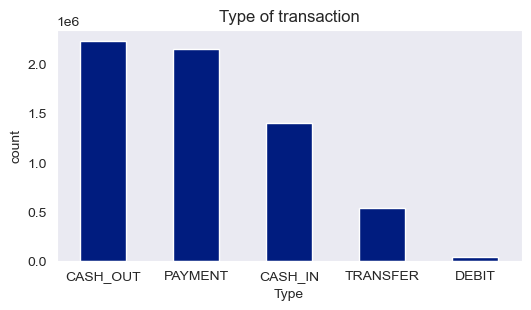

In [9]:
sns.set_style("dark")
sns.set_palette("dark")
plt.figure(figsize = (6,3))
df['type'].value_counts().plot(kind = 'bar')
plt.title('Type of transaction')
plt.xticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

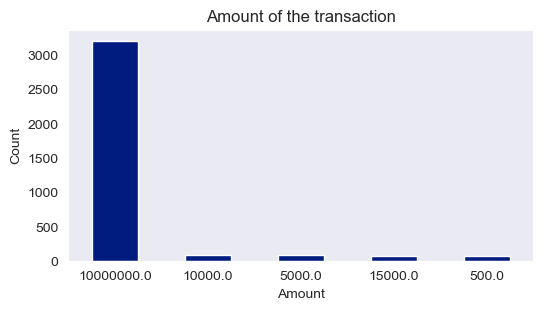

In [10]:
sns.set_style("dark") 
sns.set_palette("dark")
plt.figure(figsize = (6,3))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title("Amount of the transaction")
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.xlabel('Amount')
plt.show()

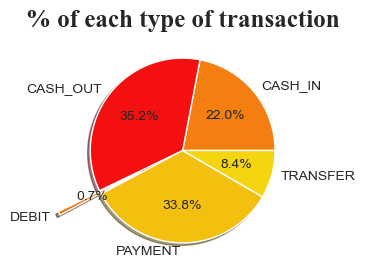

In [11]:
df.groupby('type').count()['amount']
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,3))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0, 0, 0.5, 0, 0),textprops={'fontsize': 10})
plt.title('% of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

In [12]:
df.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

In [13]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

In [14]:
correlation = numeric_data.corr()

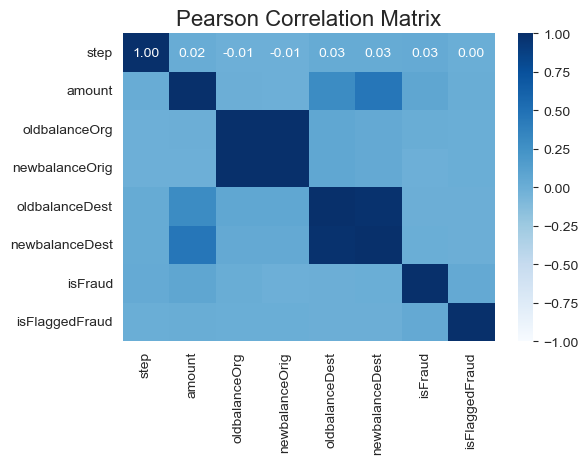

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Blues",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 90)
plt.show()

In [16]:
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig', 'nameDest'], axis = 1, inplace = True)

In [17]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [18]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [19]:
df

,step,type,amount,isFraud,isFlaggedFraud
0,1,3,9839.64,0,0
1,1,3,1864.28,0,0
2,1,4,181.00,1,0
3,1,1,181.00,1,0
4,1,3,11668.14,0,0
...,...,...,...,...,...
6362615,743,1,339682.13,1,0
6362616,743,4,6311409.28,1,0
6362617,743,1,6311409.28,1,0
6362618,743,4,850002.52,1,0


In [20]:
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
scale_pos_weight = len(y_train) / sum(y_train)

In [24]:
xgb = XGBClassifier(
    max_depth=6,               # Maximum tree depth
    learning_rate=0.1,         # Step size for weight updates
    n_estimators=100,          # Number of boosting rounds
    scale_pos_weight=1,        # Adjust for class imbalance
    eval_metric='logloss',     # Evaluation metric for training
    use_label_encoder=False    # Disable label encoding warnings
)

In [25]:
xgb.fit(X_train, y_train)

C:\Users\komal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:11:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred_xgb = xgb.predict(X_test)

In [27]:
accuracy_gb_og = accuracy_score(y_test, y_pred_xgb)

In [28]:
accuracy_gb_og 

0.9989254950528765

In [29]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix:
[[1906301      50]
 [   2001     434]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.18      0.30      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.59      0.65   1908786
weighted avg       1.00      1.00      1.00   1908786



In [30]:
# RandomizedSearch insetad of grid

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [1, scale_pos_weight]  # Replace 'scale_pos_weight' with an actual value
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions=param_dist, 
    n_iter=10, 
    scoring='recall', 
    cv=5
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)


C:\Users\komal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:11:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\komal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:12:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\komal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:12:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\komal\anaconda3\Lib\site-packages\

In [34]:
# Get the best hyperparameters and score
best_params = random_search.best_params_  # Best hyperparameters
best_score = random_search.best_score_    # Best recall score

# Print the results
print("Best hyperparameters:", best_params)
print("Best recall score:", best_score)

# Get the best model from the search
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

Best hyperparameters: {'scale_pos_weight': 770.8262374524056, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.05}
Best recall score: 0.8691598136580836


In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9005928375417673
Precision: 0.0109909044391767
Recall: 0.864476386036961


In [36]:
# True Positives (TP): The number of correctly identified fraud cases.